In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split


In [21]:
# Load Breast Cancer dataset
breast_cancer = datasets.load_breast_cancer()

# Select features and target
X = breast_cancer.data[:, 0].reshape(-1, 1)  # Use mean radius as input feature
y = breast_cancer.data[:, 3]  # Use mean area as the target feature

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None  # Initialize weights as None
        self.bias = 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # Initialize weights as a vector of zeros

        # Gradient Descent
        for _ in range(self.num_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Calculate gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


In [26]:
# Initialize the model and train it
model = LinearRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)


In [27]:
# Calculate Mean Squared Error
mse = np.mean((predictions - y_test) ** 2)
print("Mean Squared Error:", mse)

# Calculate R-squared score for accuracy measurement
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual = np.sum((y_test - predictions) ** 2)
r_squared = 1 - (ss_residual / ss_total)
print("R-squared:", r_squared)


Mean Squared Error: 5.558302348149644e+109
R-squared: -4.8202515591711414e+104


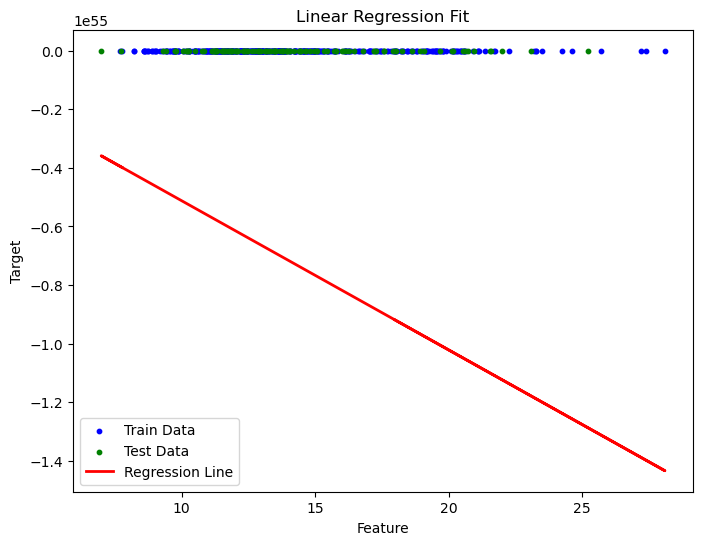

In [30]:
y_pred_line = model.predict(X)  # Predictions for all the data points to plot the line

# Create the plot
fig = plt.figure(figsize=(8, 6))

# Plot training data
plt.scatter(X_train, y_train, color='blue', label='Train Data', s=10)

# Plot test data
plt.scatter(X_test, y_test, color='green', label='Test Data', s=10)

# Plot the regression line
plt.plot(X, y_pred_line, color='red', label='Regression Line', linewidth=2)

plt.legend()
plt.title('Linear Regression Fit')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()